In [2]:
from image_processor import find_pv_module, fix_barrel_distortion, random_image, split_module_to_cells
import numpy as np
import cv2
import matplotlib.pyplot as plt

1/1 [==============================] - 1s 678ms/step


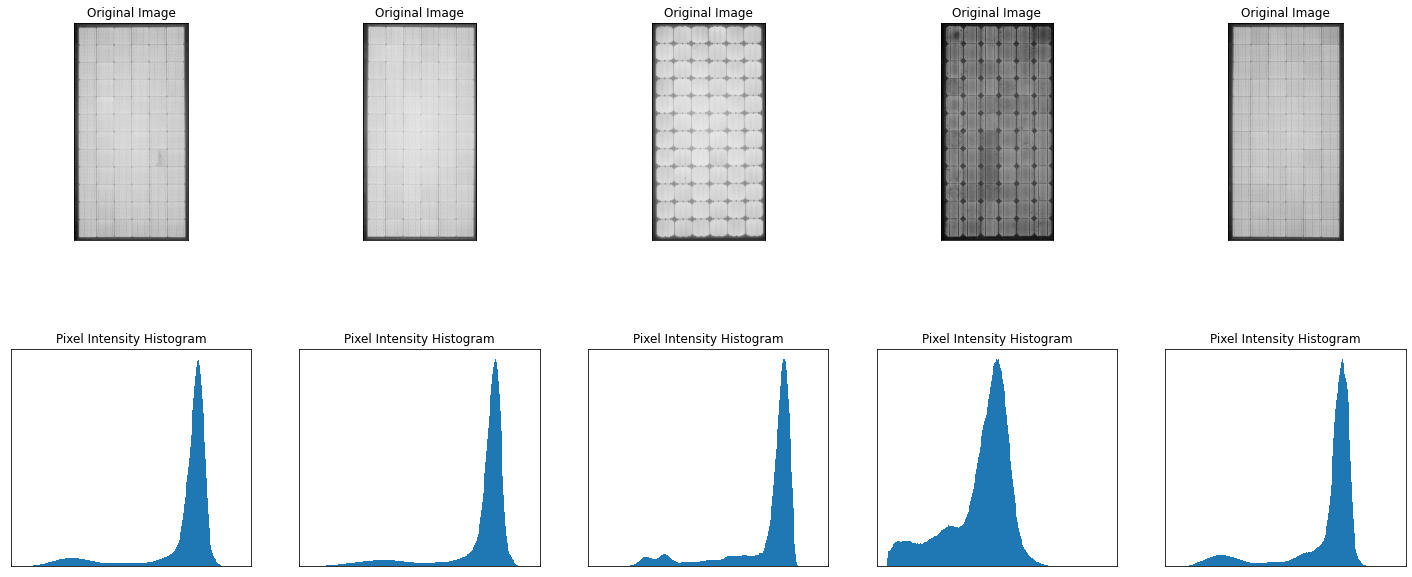

In [3]:
model_path_cells = "C:/Users/chuck/OneDrive/Desktop/Honors/models/resnet_backbone_512.hdf5"
model_path_module = "C:/Users/chuck/OneDrive/Desktop/Honors/models/resnet_PV_module_256.hdf5"
folders = ["C:/Users/chuck/OneDrive/Desktop/Honors/M0060/M0060",
            "C:/Users/chuck/OneDrive/Desktop/Honors/BT1/BT1"]
toml_path = "C:/Users/chuck/OneDrive/Desktop/Honors/solarEL/solarel/configs/camera_config.toml"

images = []
for i in range(5):
    image = random_image(folders)
    image = fix_barrel_distortion(image, toml_path)
    image = find_pv_module(image, model_path_module, show=False)
    images.append(image)


num_images = len(images)
fig, ax = plt.subplots(2, num_images, figsize=(5 * num_images, 10))

# Loop through the images and plot them
for i, img in enumerate(images):
    # Plot the original image
    ax[0, i].imshow(img)
    ax[0, i].yaxis.set_tick_params(labelbottom=False, labelleft=False)
    ax[0, i].set_xticks([])
    ax[0, i].set_yticks([])
    ax[0, i].set_title('Original Image')

    # Plot the histogram of pixel intensity
    ax[1, i].hist(img.ravel(), bins=256, range=(0, 256))
    ax[1, i].yaxis.set_tick_params(labelbottom=False, labelleft=False)
    ax[1, i].set_xticks([])
    ax[1, i].set_yticks([])
    ax[1, i].set_title('Pixel Intensity Histogram')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the figure
plt.show()

In [4]:
image = random_image(folders)
panel_image_rows = split_module_to_cells(model_path_module, model_path_cells, image, toml_path, show=False)

['C:/Users/chuck/OneDrive/Desktop/Honors/M0060/M0060', 'C:/Users/chuck/OneDrive/Desktop/Honors/BT1/BT1']
1/1 [==============================] - 0s 337ms/step


[]


C:\Users\chuck\AppData\Local\Temp\ipykernel_17988\2375700828.py:2: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(panel_image_rows[3][4])


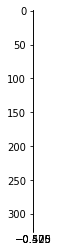

In [14]:
print(panel_image_rows[3][4])
plt.imshow(panel_image_rows[3][4])